<a href="https://colab.research.google.com/github/okelvynsantana/crash_course_linear_regression/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install wget


  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=cc46650774f7365fa8aa647488a7c2a7d9d56aca31c0c6d7e4e4cb0c61bfc3da
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
!wget https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv


--2021-08-17 03:41:26--  https://raw.githubusercontent.com/diogocortiz/Crash-Course-IA/master/RegressaoLinear/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.002s  

2021-08-17 03:41:26 (35.9 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



**Importação das bibliotecas**

In [ ]:

from matplotlib import pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [ ]:
df = pd.read_csv("FuelConsumptionCo2.csv")

print(df.head())

   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]


In [ ]:
print(df.describe())

       MODELYEAR   ENGINESIZE  ...  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS
count     1067.0  1067.000000  ...               1067.000000   1067.000000
mean      2014.0     3.346298  ...                 26.441425    256.228679
std          0.0     1.415895  ...                  7.468702     63.372304
min       2014.0     1.000000  ...                 11.000000    108.000000
25%       2014.0     2.000000  ...                 21.000000    207.000000
50%       2014.0     3.400000  ...                 26.000000    251.000000
75%       2014.0     4.300000  ...                 31.000000    294.000000
max       2014.0     8.400000  ...                 60.000000    488.000000

[8 rows x 8 columns]


In [ ]:
motors = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]

print(motors.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


In [ ]:
train_motors, test_motors, train_co2, test_co2 = train_test_split(motors, co2, test_size=0.2, random_state=42)
print(type(train_motors))

<class 'pandas.core.frame.DataFrame'>


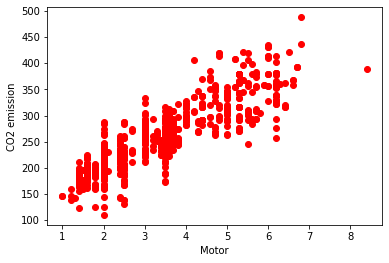

In [ ]:
plt.scatter(train_motors, train_co2, color='red')
plt.xlabel("Motor")
plt.ylabel("CO2 emission")
plt.show()

In [ ]:
# Create a Linear Regression Model
model = linear_model.LinearRegression()

# train model with trains dataset
model.fit(train_motors, train_co2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('(A) interceptor', model.intercept_)
print('(B) inclinação', model.coef_)

(A) interceptor [126.28970217]
(B) inclinação [[38.99297872]]


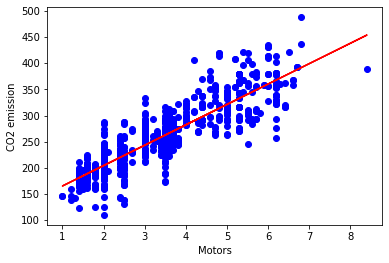

In [ ]:
plt.scatter(train_motors, train_co2, color='blue')
plt.plot(train_motors, model.coef_[0][0]*train_motors + model.intercept_[0], '-r')
plt.xlabel('Motors')
plt.ylabel('CO2 emission')
plt.show()

In [ ]:
co2_predictions = model.predict(test_motors)

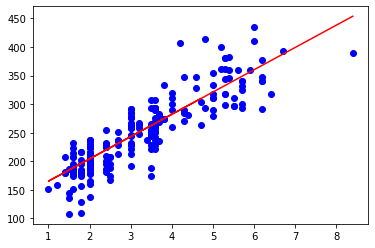

In [ ]:
plt.scatter(test_motors, test_co2, color='blue')
plt.plot(test_motors, model.coef_[0][0]*test_motors + model.intercept_[0], '-r')

In [ ]:
print("Soma dos erros ao quadrado (SSE): %2.f" % np.sum((co2_predictions - test_co2)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(test_co2, co2_predictions))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(test_co2, co2_predictions))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(test_co2, co2_predictions)))
print("R2-score: %.2f" % r2_score(co2_predictions , test_co2) )

Soma dos erros ao quadrado (SSE): 210991
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
